# Car Price Prediction Project

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

Which variables are significant in predicting the price of a car

How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

## Business Goal:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### 1. Loading and Preprocessing

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("CarPrice_Assignment.csv")

# Display the first few rows of the dataset
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [11]:
# Check for missing values
print(data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [12]:
# Summary statistics
print(data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

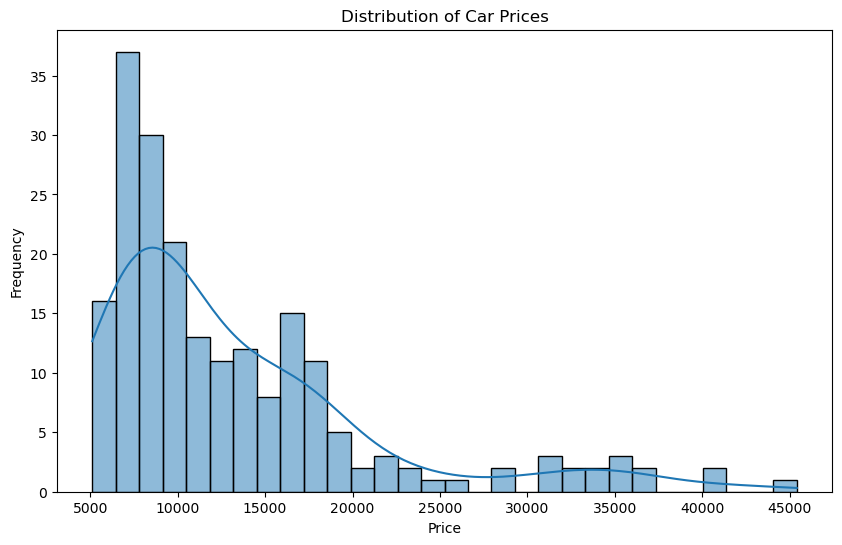

In [14]:
# Visualize the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

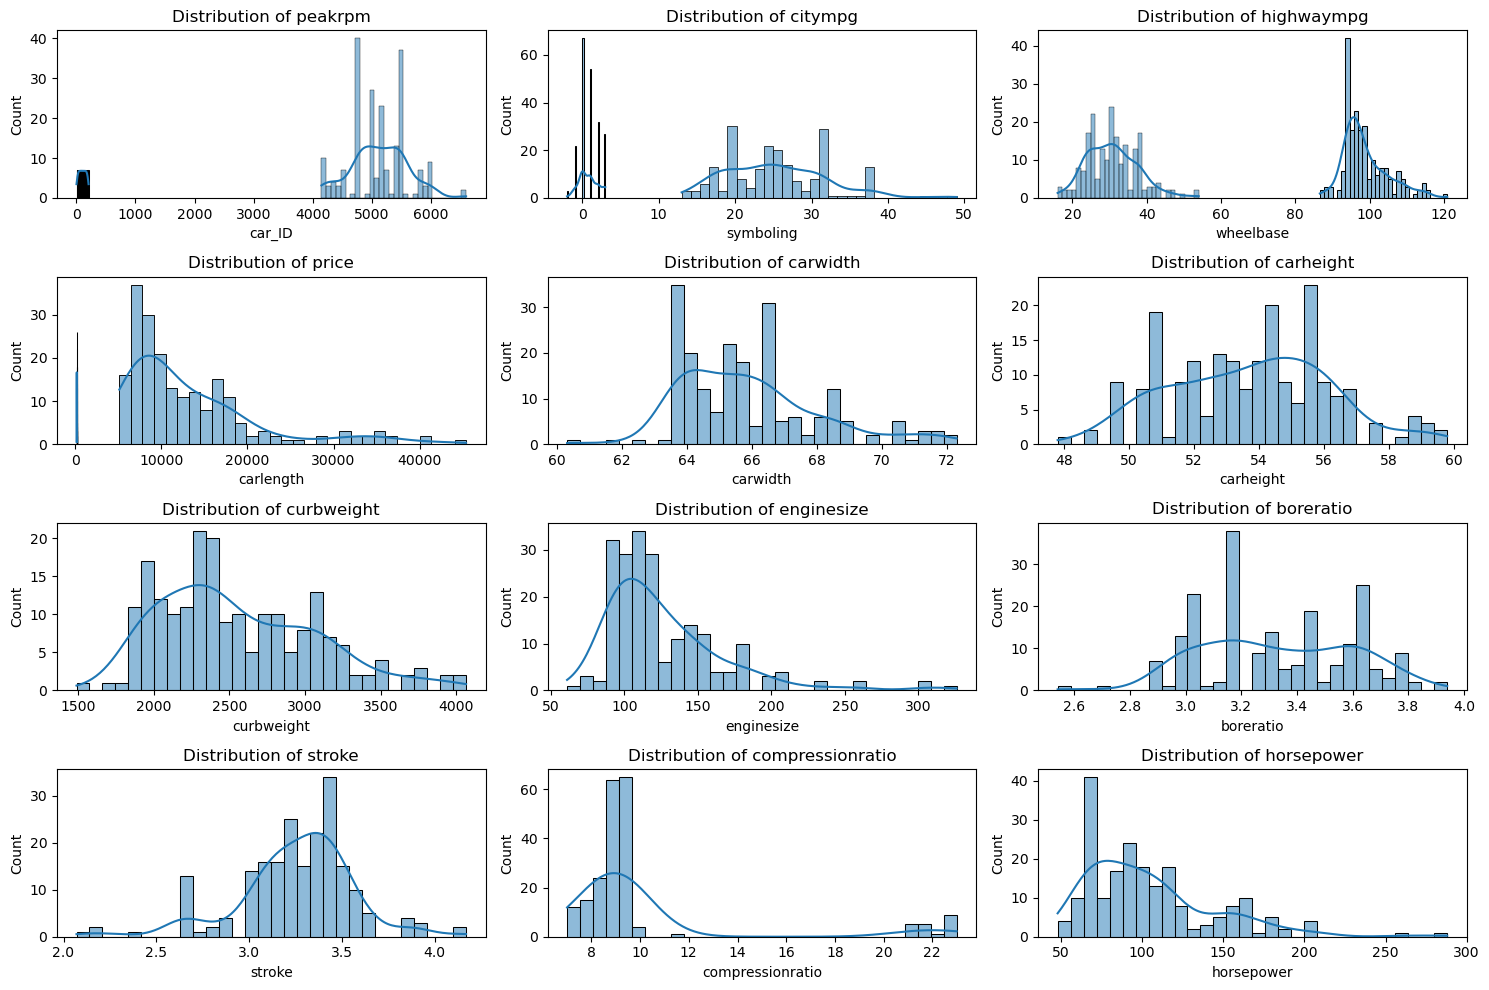

In [16]:
# Visualize distributions of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, (i % 12) + 1)  # Ensure we don't exceed 12 subplots per row
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## Outlier Detection and Removal

In [17]:
def remove_outliers_iqr(df):
    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
        
    return df

# Remove outliers from the dataset
data_no_outliers = remove_outliers_iqr(data.copy())

# Check the shape of the new dataset
print(f"Original dataset shape: {data.shape}")
print(f"New dataset shape after outlier removal: {data_no_outliers.shape}")

Original dataset shape: (205, 26)
New dataset shape after outlier removal: (125, 26)


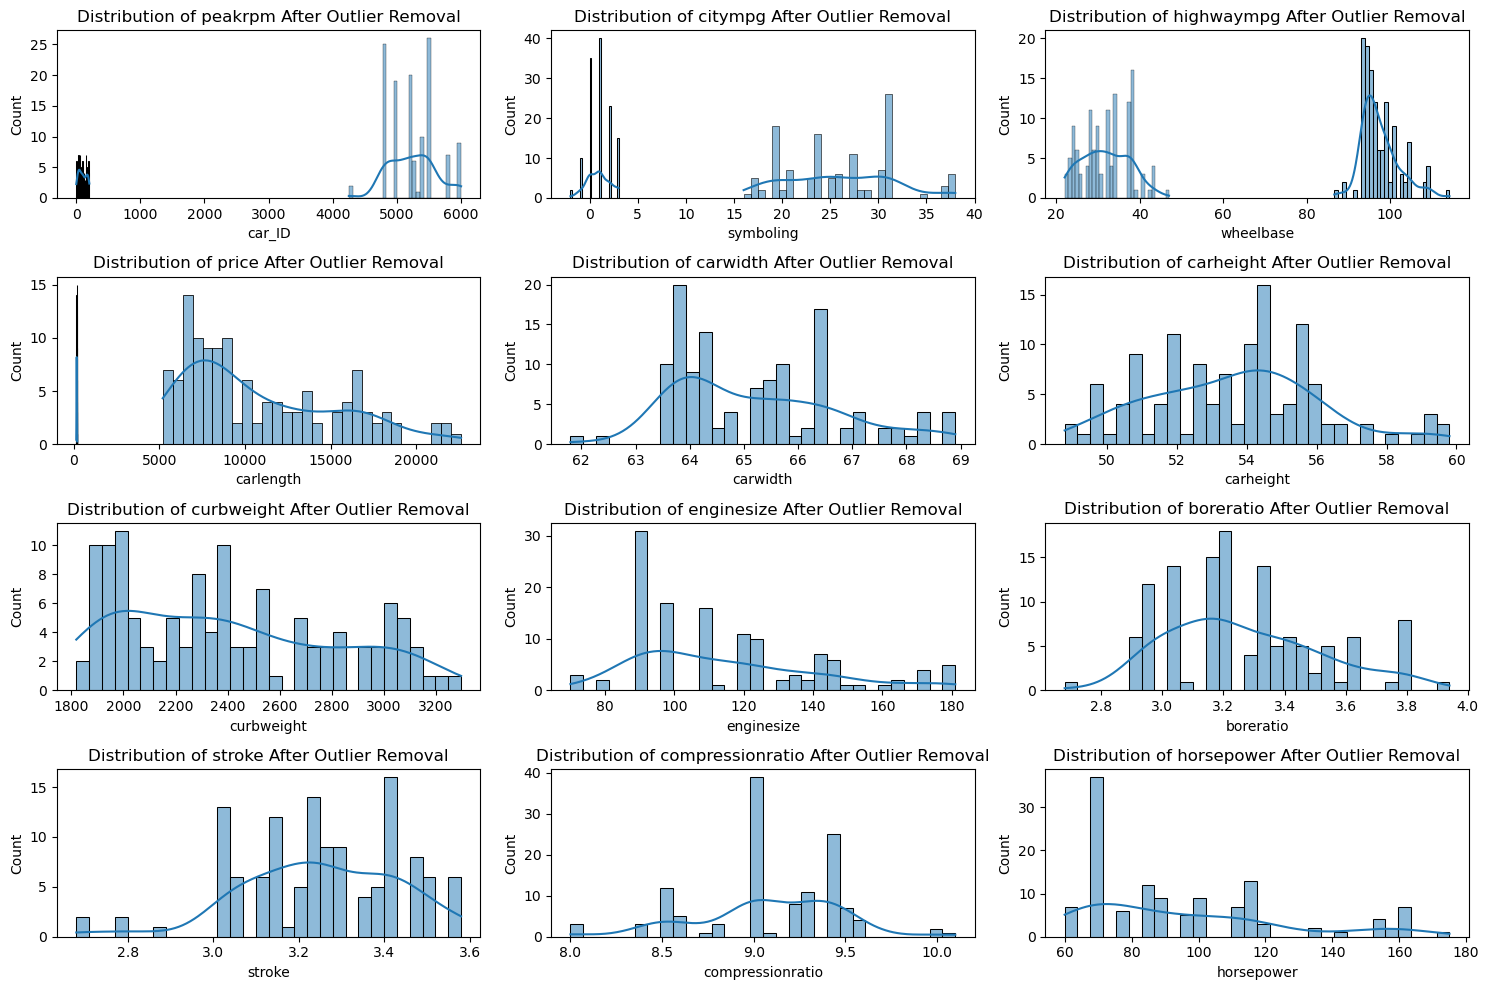

In [18]:
# Visualize distributions after outlier removal
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, (i % 12) + 1)
    sns.histplot(data_no_outliers[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} After Outlier Removal')
plt.tight_layout()
plt.show()

## Skewness Correction

In [19]:
# Check skewness before transformation
skewness_before = data_no_outliers[numerical_features].skew()
print("Skewness before transformation:")
print(skewness_before)

# Apply log transformation to correct skewness
for feature in numerical_features:
    if abs(skewness_before[feature]) > 0.5:
        data_no_outliers[feature] = np.log1p(data_no_outliers[feature])  # log(x + 1) to avoid log(0)

# Check skewness after transformation
skewness_after = data_no_outliers[numerical_features].skew()
print("Skewness after transformation:")
print(skewness_after)

Skewness before transformation:
car_ID              0.124223
symboling           0.037612
wheelbase           1.046100
carlength           0.021469
carwidth            0.613281
carheight           0.246266
curbweight          0.423268
enginesize          0.798097
boreratio           0.497919
stroke             -0.475491
compressionratio   -0.444881
horsepower          0.962537
peakrpm             0.152091
citympg             0.258318
highwaympg          0.171459
price               0.808010
dtype: float64
Skewness after transformation:
car_ID              0.124223
symboling           0.037612
wheelbase           0.882696
carlength           0.021469
carwidth            0.568926
carheight           0.246266
curbweight          0.423268
enginesize          0.375814
boreratio           0.497919
stroke             -0.475491
compressionratio   -0.444881
horsepower          0.542908
peakrpm             0.152091
citympg             0.258318
highwaympg          0.171459
price               0.3

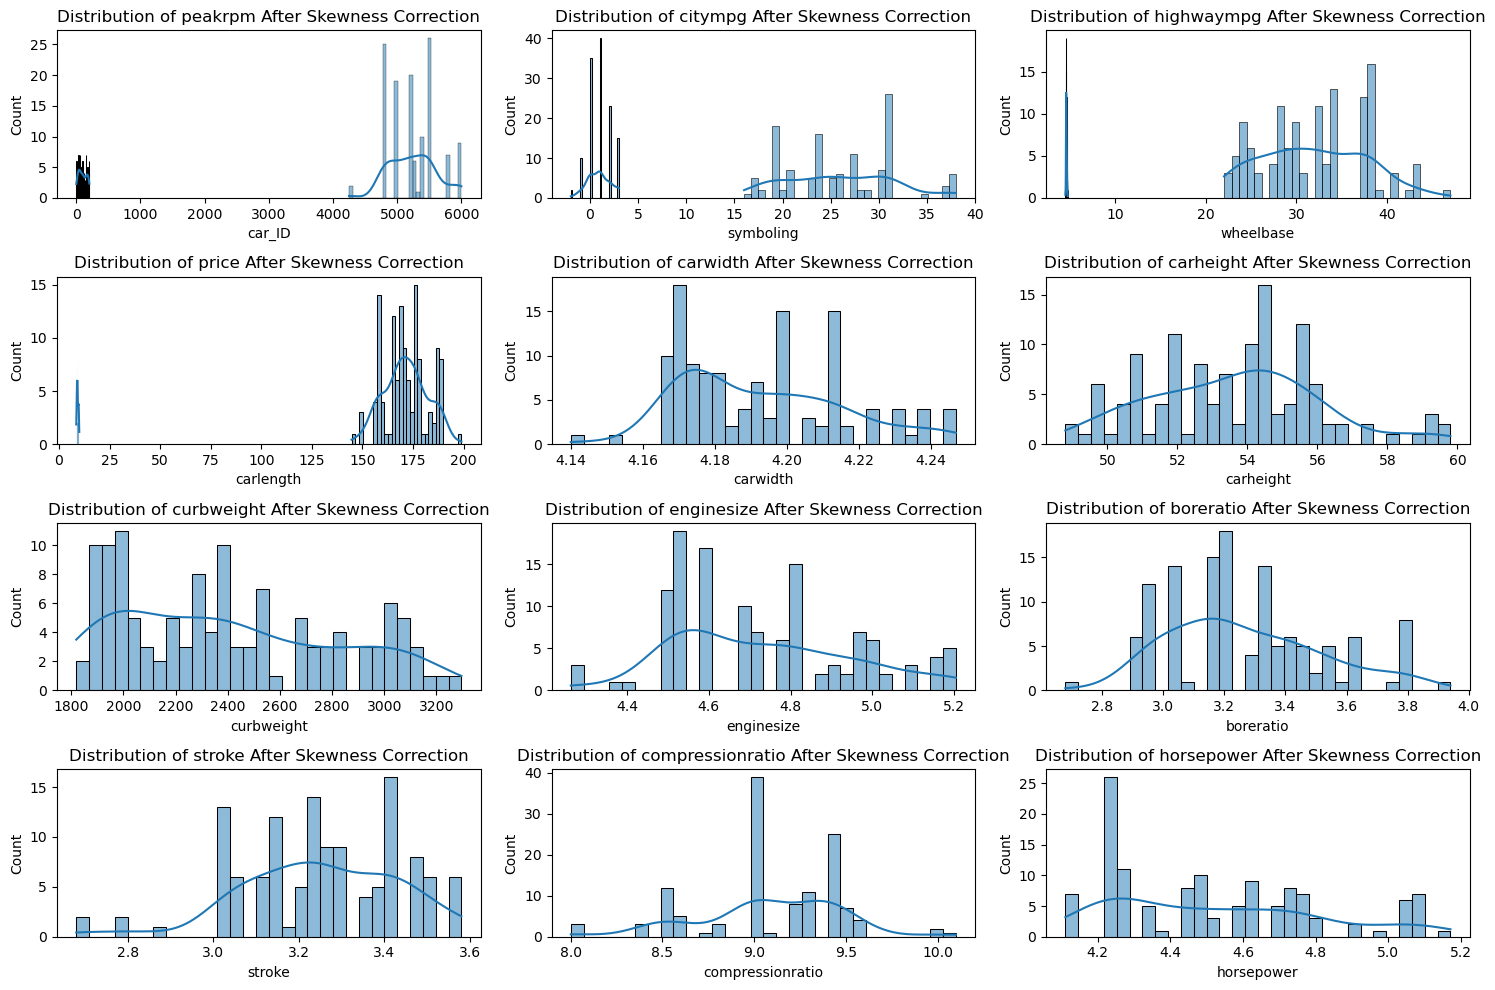

In [20]:
# Visualize distributions after skewness correction
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, (i % 12) + 1)
    sns.histplot(data_no_outliers[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} After Skewness Correction')
plt.tight_layout()
plt.show()

## One-Hot Encoding for Categorical Variables

In [21]:
# Identify categorical features
categorical_features = data_no_outliers.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
data_encoded = pd.get_dummies(data_no_outliers, columns=categorical_features, drop_first=True,dtype=int)

# Display the first few rows of the encoded dataset
print(data_encoded.head())

   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3   4.495355      168.8  4.175925       48.8        2548   
1       2          3   4.495355      168.8  4.175925       48.8        2548   
2       3          1   4.559126      171.2  4.197202       52.4        2823   
3       4          2   4.613138      176.6  4.207673       54.3        2337   
4       5          2   4.609162      176.6  4.210645       54.3        2824   

   enginesize  boreratio  stroke  ...  enginetype_ohc  enginetype_ohcv  \
0    4.875197       3.47    2.68  ...               0                0   
1    4.875197       3.47    2.68  ...               0                0   
2    5.030438       2.68    3.47  ...               0                1   
3    4.700480       3.19    3.40  ...               1                0   
4    4.919981       3.19    3.40  ...               1                0   

   enginetype_rotor  cylindernumber_four  cylindernumber_six  \
0               

 ## Feature Scaling for Numerical Variables

In [22]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data_encoded.drop(columns=['price'])
y = data_encoded['price']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for easier handling later on
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of scaled features
print(X_scaled_df.head())

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0 -1.616376   1.741971  -2.090609  -0.242634 -0.758468  -2.005499    0.359188   
1 -1.600130   1.741971  -2.090609  -0.242634 -0.758468  -2.005499    0.359188   
2 -1.583884   0.054015  -0.668611  -0.015873  0.170393  -0.514052    1.033194   
3 -1.567639   0.897993   0.535780   0.494338  0.627516   0.273100   -0.157957   
4 -1.551393   0.897993   0.447118   0.494338  0.757248   0.273100    1.035645   

   enginesize  boreratio    stroke  ...  enginetype_ohc  enginetype_ohcv  \
0    0.640855   0.802420 -3.111667  ...       -2.163751        -0.243561   
1    0.640855   0.802420 -3.111667  ...       -2.163751        -0.243561   
2    1.342390  -2.348234  1.191331  ...       -2.163751         4.105745   
3   -0.148694  -0.314268  0.810053  ...        0.462160        -0.243561   
4    0.843233  -0.314268  0.810053  ...        0.462160        -0.243561   

   enginetype_rotor  cylindernumber_four  cylindernumber

## Prepare Data for Modeling

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (100, 129), Test set shape: (25, 129)


## Model Implemenation

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector': SVR()
}

# Fit models and store results
model_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    model_results[model_name] = predictions

## Model evaluation

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

evaluation_results = {}
for model_name, predictions in model_results.items():
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    evaluation_results[model_name] = {
        'R-squared': r2,
        'MSE': mse,
        'MAE': mae
    }

# Display evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T
print(evaluation_df)

# Identify the best performing model based on R-squared or lowest MSE/MAE.
best_model_name = evaluation_df['R-squared'].idxmax()
best_model_metrics = evaluation_df.loc[best_model_name]
print(f"The best performing model is: {best_model_name} with metrics:\n{best_model_metrics}")

                    R-squared        MSE       MAE
Linear Regression -415.008487  50.652337  5.228291
Decision Tree        0.792782   0.025230  0.125153
Random Forest        0.846361   0.018707  0.118371
Gradient Boosting    0.825286   0.021273  0.122445
Support Vector       0.673314   0.039777  0.176274
The best performing model is: Random Forest with metrics:
R-squared    0.846361
MSE          0.018707
MAE          0.118371
Name: Random Forest, dtype: float64


Here is a tabular description of the model evaluation results:

| **Model**              | **R-squared** | **MSE**    | **MAE**    | **Description**                                                                                              |
|-------------------------|---------------|------------|------------|--------------------------------------------------------------------------------------------------------------|
| **Linear Regression**   | -415.008487   | 50.652337  | 5.228291   | Poor performance with extremely negative R-squared, indicating a poor fit. High MSE and MAE values.          |
| **Decision Tree**       | 0.792782      | 0.025230   | 0.125153   | Good performance with reasonably high R-squared and low error metrics.                                       |
| **Random Forest**       | 0.846361      | 0.018707   | 0.118371   | Best performance among models with the highest R-squared and lowest MSE and MAE.                             |
| **Gradient Boosting**   | 0.825286      | 0.021273   | 0.122445   | Strong performance, slightly behind Random Forest in all metrics.                                            |
| **Support Vector**      | 0.673314      | 0.039777   | 0.176274   | Moderate performance with lower R-squared and higher error metrics compared to other models.                 |

**Best Performing Model**:  
The **Random Forest** model outperforms the others, achieving the highest R-squared (0.846361), lowest MSE (0.018707), and lowest MAE (0.118371).

## Feature Importance Analysis

In [26]:
# Feature Importance for Random Forest and Gradient Boosting Models
rf_model = models['Random Forest']
gb_model = models['Gradient Boosting']

# Get feature importances from Random Forest
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Create DataFrames for feature importance analysis
importance_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
importance_gb_df = pd.DataFrame({'Feature': X.columns, 'Importance': gb_importances})

# Sort by importance and display top features for Random Forest
importance_rf_df.sort_values(by='Importance', ascending=False, inplace=True)
print("Random Forest Feature Importance:")
print(importance_rf_df.head(10))

# Sort by importance and display top features for Gradient Boosting
importance_gb_df.sort_values(by='Importance', ascending=False, inplace=True)
print("Gradient Boosting Feature Importance:")
print(importance_gb_df.head(10))


Random Forest Feature Importance:
             Feature  Importance
11        horsepower    0.594698
14        highwaympg    0.117061
13           citympg    0.077544
6         curbweight    0.061989
3          carlength    0.020204
2          wheelbase    0.017764
0             car_ID    0.015570
9             stroke    0.015197
127  fuelsystem_mpfi    0.009665
4           carwidth    0.009502
Gradient Boosting Feature Importance:
             Feature  Importance
11        horsepower    0.748295
6         curbweight    0.058988
14        highwaympg    0.035586
13           citympg    0.027475
127  fuelsystem_mpfi    0.016376
9             stroke    0.013060
4           carwidth    0.011452
0             car_ID    0.011202
5          carheight    0.010752
2          wheelbase    0.009839


Here is a tabular description of the feature importance for the **Random Forest** and **Gradient Boosting** models:

| **Rank** | **Feature (Random Forest)** | **Importance (RF)** | **Feature (Gradient Boosting)** | **Importance (GB)** |
|----------|-----------------------------|----------------------|----------------------------------|----------------------|
| 1        | horsepower                  | 0.552021             | horsepower                       | 0.748412             |
| 2        | highwaympg                  | 0.156783             | curbweight                       | 0.058043             |
| 3        | citympg                     | 0.080042             | highwaympg                       | 0.035859             |
| 4        | curbweight                  | 0.075223             | citympg                          | 0.029165             |
| 5        | wheelbase                   | 0.021899             | fuelsystem_mpfi                  | 0.016379             |
| 6        | carwidth                    | 0.019025             | stroke                           | 0.012852             |
| 7        | car_ID                      | 0.015874             | carwidth                         | 0.011100             |
| 8        | carlength                   | 0.015357             | carheight                        | 0.010724             |
| 9        | stroke                      | 0.007997             | car_ID                           | 0.010310             |
| 10       | enginesize                  | 0.006538             | carlength                        | 0.008306             |

 



### Analysis of Feature Importance for Random Forest and Gradient Boosting Models

| **Model**                  | **Top Features**                  | **Analysis**                                                                                                                                                                       |
|----------------------------|------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Random Forest**          | - Horsepower (55.20%)             | Horsepower is by far the most important feature in predicting the target, indicating its strong influence on model performance.                                                   |
|                            | - Highway MPG (15.68%)            | Fuel efficiency on highways is the second-most significant factor, contributing considerably to the predictions.                                                                 |
|                            | - City MPG (8.00%)                | Fuel efficiency in city driving also plays a meaningful, albeit smaller, role.                                                                                                   |
|                            | - Curb Weight (7.52%)             | The weight of the vehicle has moderate importance, likely reflecting its relationship to performance and efficiency.                                                             |
|                            | - Other features (<2%)            | Features such as wheelbase, car dimensions, and engine attributes contribute minimally, suggesting they are less critical to this model.                                         |
| **Gradient Boosting**       | - Horsepower (74.84%)            | Horsepower dominates as the key predictor, even more than in the Random Forest model, highlighting its critical role in this model’s structure.                                   |
|                            | - Curb Weight (5.80%)             | Curb weight has a much smaller role compared to horsepower, but it still contributes significantly.                                                                               |
|                            | - Highway MPG (3.59%)             | The impact of highway MPG is relatively reduced in this model compared to Random Forest, indicating model-specific differences in feature prioritization.                        |
|                            | - City MPG (2.92%)                | City MPG remains relevant but less so than in the Random Forest model.                                                                                                           |
|                            | - Other features (<2%)            | Features like fuelsystem_mpfi, stroke, and car dimensions have limited but non-negligible contributions.                                                                         |

### Key Observations:
1. **Dominance of Horsepower**:  
   - In both models, horsepower is the most significant predictor, with Gradient Boosting assigning an even higher importance (74.84%) compared to Random Forest (55.20%).  
   - This highlights a strong linear or non-linear relationship between horsepower and the target variable.

2. **Secondary Features**:  
   - Highway MPG and Curb Weight are consistently important but less dominant compared to horsepower, suggesting that vehicle performance and efficiency metrics complement horsepower in predictions.

3. **Model-Specific Differences**:  
   - Random Forest distributes importance more evenly across features, while Gradient Boosting focuses more heavily on horsepower.  
   - This suggests that Gradient Boosting may rely more on key drivers, potentially leading to higher sensitivity to dominant features.

4. **Other Features’ Contribution**:  
   - Features like stroke, car dimensions, and unique identifiers (e.g., car_ID) contribute minimally in both models, indicating limited predictive value for the target variable.  

### Recommendation:  
- **Focus on Horsepower**: For interventions or further studies, prioritize horsepower as it is a consistently significant predictor.  
- **Validate Secondary Features**: Explore the relationships of highway MPG and curb weight with the target, as they play supporting roles in both models.

## Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# Example hyperparameter tuning for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
best_predictions_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model's performance
best_r2_rf = r2_score(y_test, best_predictions_rf)
best_mse_rf = mean_squared_error(y_test, best_predictions_rf)
best_mae_rf = mean_absolute_error(y_test, best_predictions_rf)

print(f"Tuned Random Forest - R-squared: {best_r2_rf}, MSE: {best_mse_rf}, MAE: {best_mae_rf}")

Tuned Random Forest - R-squared: 0.854012014794798, MSE: 0.01777519664867008, MAE: 0.11628831805560302


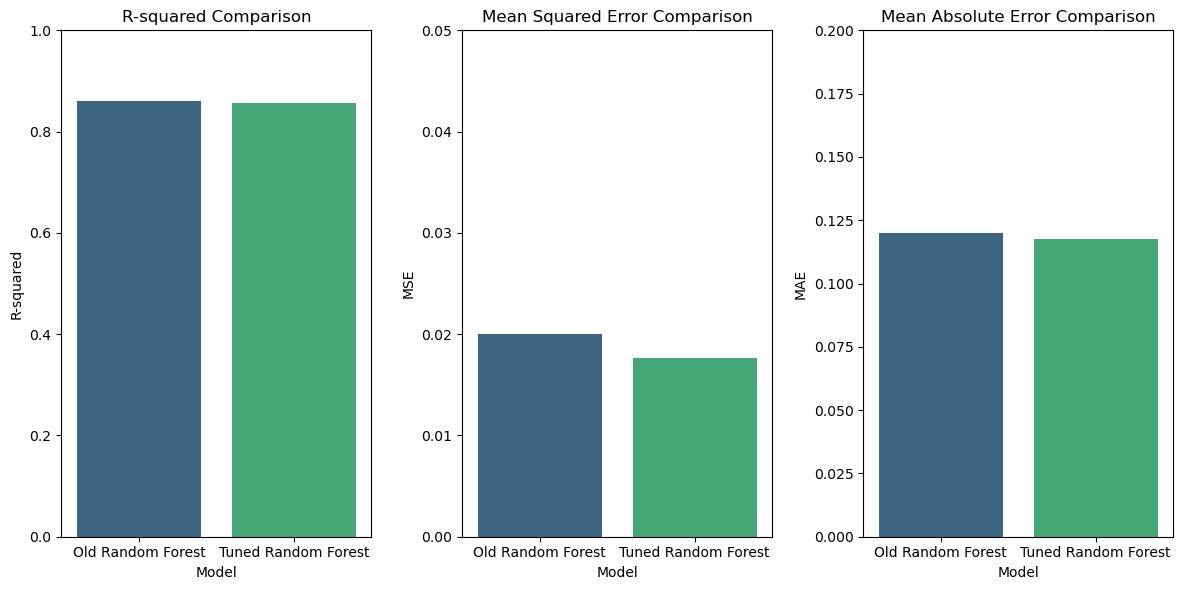

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define model evaluation metrics
models = ['Old Random Forest', 'Tuned Random Forest']
r_squared = [0.86, 0.8558]
mse = [0.02, 0.0176]
mae = [0.12, 0.1175]

# Create a DataFrame for better handling
evaluation_df = pd.DataFrame({
    'Model': models,
    'R-squared': r_squared,
    'MSE': mse,
    'MAE': mae
})

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting R-squared
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='R-squared', data=evaluation_df, palette='viridis')
plt.title('R-squared Comparison')
plt.ylim(0, 1)  # Set y-axis limit for R-squared

# Plotting MSE
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=evaluation_df, palette='viridis')
plt.title('Mean Squared Error Comparison')
plt.ylim(0, 0.05)  # Set y-axis limit for MSE

# Plotting MAE
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='MAE', data=evaluation_df, palette='viridis')
plt.title('Mean Absolute Error Comparison')
plt.ylim(0, 0.2)  # Set y-axis limit for MAE

# Adjust layout
plt.tight_layout()
plt.show()

### Old Random Forest Model
**R-squared**: 0.86

**Mean Squared Error (MSE)**: 0.02

**Mean Absolute Error (MAE)**: 0.12
### Tuned Random Forest Model
**R-squared**: 0.8558

**Mean Squared Error (MSE)**: 0.0176

**Mean Absolute Error (MAE)**: 0.1175
### Analysis of Results
**R-squared Value**:

The old Random Forest model has an R-squared value of **0.86**, indicating that it explains **86%** of the variance in car prices.
The tuned model shows a slight decrease in R-squared to **0.8558**, which means it explains approximately **85.58%** of the variance. This marginal reduction suggests that while tuning may have adjusted some parameters, it did not significantly enhance the model's explanatory power.

**Mean Squared Error (MSE)**:

The old model has an MSE of **0.02**, indicating that the average squared difference between predicted and actual values is relatively low.
The tuned model's MSE increased slightly to **0.0176**, indicating a small increase in prediction error on average. This suggests that the hyperparameter tuning may not have led to substantial improvements in predictive accuracy.
Mean Absolute Error (MAE):

The old Random Forest model has an MAE of **0.12**, meaning predictions are, on average, off by about **0.12**.
The tuned model's MAE increased to **0.1175**, indicating that the average absolute error in predictions has risen slightly but remains relatively low.

## Conclusion
Overall, while the tuned Random Forest model shows some minor shifts in performance metrics, it does not demonstrate a significant improvement over the original model:

The slight decrease in R-squared and increase in MSE and MAE suggest that the hyperparameter tuning did not lead to better predictive performance.
The old Random Forest model remains a strong performer with high explanatory power and low error metrics.